# Decision Trees in Python
In this notebook we will use **scikit-learn** and **Cost Complexity Pruning** to build **Classification Tree**, which uses continuous and categorical data from the **UCI Machine Learning Repository** to predict whether or not a patient has **heart disease**: 

**Classification Trees** are an exceptionally useful machine learning method when you need to know how the decisions are being made. For example, if you have to justify the predictions to your boss, **Classification Trees** are a good method because each step in the decision making process is easy to understand.

In this notebook we will discuss about...
* Importing Data
* Handling Missing Data
  * Identifying Missing Data
  * Dealing with Missing Data
* Formatting the Data for Decision Trees
  * Splitting data into Dependent and Independent Variables
  * One-Hot-Encoding
* Feature Scaling
* Splitting the data into Training and Test sets
* Building a Preliminary Classification Tree
* Optimixing the tree with Cost Complexity Pruning
  * Visualizing Alpha
  *Using Cross Validation to find the best value for Alpha
* Building, Drawing, Interpreting and Evaluating the Final Classification Tree


## Prerequisites for this Algorithm:
* Classification Trees
* Cost Complexity Pruning
* Cross Validation
* Confusion Matrices
* Bias and Variance

## Importing the required modules
The very first thing we do is load in a bunch of Python modules

In [1]:
import numpy as np    # To load and manipulate data and for One-Hot-Encoding
import pandas as pd   # To load the data, calculate the mean and standard deviation
import matplotlib.pyplot as plt   # To plot graphs
from sklearn.tree import DecisionTreeClassifier   # To build a classification tree
from sklearn.tree import plot_tree    # To draw a classification tree
from sklearn.model_selection import train_test_split    # To split data into training and test sets
from sklearn.model_selection import cross_val_score     # For cross validation
from sklearn.metrics import confusion_matrix    # To create a confusion matrix
from sklearn.metrics import plot_confusion_matrix   # To draw a confusion matrix

## Importing the Data
We load the Dataset from the **UCI Machine Learning Repository**. Specially, we are going to use the **Heart Disease Dataset**. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics. 

### Note:
When **Pandas(pd)** reads in data, it returns a **dataframe**, which looks like a spreadsheet. The data is organized in rows and columns and each row can contain a mixture of text and numbers. The standard variable name for a **dataframe** is the initials **df**.

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, header=None)

## Exploring the Dataset
Now that we have loaded the data into a **dataframe** called **df**, lets explore the data using some **pandas** functions.

In [4]:
# Printing the first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that, instead of nice column names, we just have column numbers. Since nice column names would make it easier to know how to format the data, let's replace the column numbers with the following column names:
* **age**
* **sex**
* **cp**, chestpain
* **restbp**, resting blood pressure ( in mm Hg)
* **chol**, serum cholesterol in mg/dl
* **fbs**, fasting blood sugar
* **restecg**, resting electrocardiographic results
* **thalach**, maximum heart rate achieved
* **exang**, exercise induced angina
* **oldpeak**, ST depression induced by exercise relative to rest
* **slope**, the slope of the peak exercise ST segment
* **ca**, number of major vessels (0-3) colored by fluoroscopy
* **thal**, this is short of thalium heart scan
* **hd**, diagnosis of heart desease, the predicted attribute

In [5]:
# Changing the column numbers to column names
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

# Print the first 5 rows
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We have replaced the column numbers with nice, easy to remember names. Now that we have the data in a **dataframe** called **df**.

In [6]:
# Check the shape of the dataframe using .shape attribute which shows the total no.of rows and columns 
df.shape

(303, 14)

The dataset contains of 303 rows(samples) and 14 columns(features)

To display the statistical analysis we use **describe()** function

In [7]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## Data Handling
## 1. Identifying Missing Data
The biggest part of any data analysis project is making sure that the data is correctly formatted and fixing it when it is not. the first part of this process si identifying and dealing with **Missing Data**.

**Missing Data** is simply a blank space, or a surrogate value like **NA**, that indicates that we failed to collect data for one of the features. For example, if we forgot to ask someone's age, or forgot to write it down, then we would have a blank space in the dataset for that person's age.

There are two main ways to deal with missing data:
1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but it wastes all of the other values that we collected. How a big of a waste this is depends on how important this missing value is for classification. For example, if we are missing a value for **age**, and **age** is not useful for classifying if people have heart disease or not, then it is not appropriate to throw out all of someone's data just because we do not have their **age**.
2. We can **impute** the values that are missing. In this context **impute** is just a fancy way of saying "we can make an educated guess about what the value should be". Continuing our example where we are missing a value for **age**, instead of throwing out the entire row of data, we can fill the missing value with the **average age** or **median age**, or use some other, more sophisticated approach, to guess at an appropriate value.

In this section, we'll focus on identifying missing values in the dataset.

First, let's see what sort of data in each column.

In [8]:
# info() function gives us the entire information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


We see that they are almost all **float64**, however, two columns, **ca** and **thal**, have the **object** type and one column, **hd** has **int64**.

**Object** datatypes are used when there are mixtures of things, like a mixture of numbers and letters. Both **ca** and **thal** should just have a few values representing defferent categories, so let's investigate what's going on by printing out their unique values. We'll start with **ca**.

In [9]:
# dtypes tells us the "data type" for each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [10]:
## Print out unique values in the column called "ca"
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

We see that **ca** contains numbers (0.0, 3.0, 2.0 and 1.0) and question marks (?). The numbers represent the number of blood vessenls that we lit up by fluoroscopy and the question marks represent **Missing Data**.

Now let's look at the unique values in **thal**.

In [11]:
# Print out unique values in the column called "thal"
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

Again, **thal** also contains a mixture of numbers, representing the different diagnoses from the thalium heart scan, and question marks, which represent missing values.

Now that we have identified some missing values, we need to deal with them.

## 2. Dealing with Missing Data
Since scikit-learn's classification trees do not support datasets with missing values, we need to figure out what to do these question marks. we can wither delete these patients from the training dataset, or impute values for the missing data. First let's see how many rows cantain missing values.

In [12]:
# Print the number of rows that contain missing values.

# loc[], short for 'location', let's us specify which rows we want...
# and so we say we want any row with '?' in column 'ca'
# OR 
# any row with '?' in column 'thal'

# len(), short for 'length', prints out the number of rows

len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

Since only 6 rows have missing values, let's look at them.

In [13]:
# Print out the rows that contain missing values.

print(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

      age  sex   cp  restbp   chol  fbs  ...  exang  oldpeak  slope   ca  thal hd
87   53.0  0.0  3.0   128.0  216.0  0.0  ...    0.0      0.0    1.0  0.0     ?  0
166  52.0  1.0  3.0   138.0  223.0  0.0  ...    0.0      0.0    1.0    ?   3.0  0
192  43.0  1.0  4.0   132.0  247.0  1.0  ...    1.0      0.1    2.0    ?   7.0  1
266  52.0  1.0  4.0   128.0  204.0  1.0  ...    1.0      1.0    2.0  0.0     ?  2
287  58.0  1.0  2.0   125.0  220.0  0.0  ...    0.0      0.4    2.0    ?   7.0  0
302  38.0  1.0  3.0   138.0  175.0  0.0  ...    0.0      0.0    1.0    ?   3.0  0

[6 rows x 14 columns]


Now let's count the no. of rows in the full dataset.

In [14]:
len(df)

303

So 6 of the 303 rows, or 2%, contain missing values. Since 303 - 6 = 297, and 297 is plenty of data to build a classification tree, we will remove the rows  with missing values, rather than try to impute their values.

We remove the rows with missing values by selecting all of the rows that do not contain question marks in either the **ca** or **thal** columns:

In [15]:
# Use loc[] to select all rows that do not contain missing values
# and save them in a new dataframe called "df_no_missing"

df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

Since **df_no_missing** has 6 fewer rows than the original **df**, it should have **297** rows

In [16]:
len(df_no_missing)

297

We can also make sure **ca** no longer contains question marks by printing its unique values:

In [17]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

And we can also do the same thing for **thal**

In [18]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

We have verified that **df_no_missing** does not contain any missing values. Now we are ready to format the data for making a **Classification Tree**.

## Formatting Data
## 1. Split the Data into Dependent and Independent Features
The first step is to split the data into two parts:
1. The columns of data that we will use to make classificatons.
2. The column of data that we want to predict.

We will use the conventional notation of **X** to represent the columns of data that we will use to make classifications and **y** to represent the thing we want to predict. In this case, we want to predict **hd** (heart disease).

To extract the **Independent** and **Dependent** Features, we will use **iloc[ ]** method. It is used to extract the required rows and columns from the dataset.

In [19]:
# Extracting Independent Features

X = df_no_missing.iloc[:,:-1]

Let's check the first five rows of our Independent data

In [20]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [21]:
# Extracting Dependent Features

y = df_no_missing.iloc[:,-1]

Also, let's check the first five rows of Dependent data.

In [22]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

Now, let's continue formatting the data

## 2. One-Hot-Encoding
Let's take a closure look at the features in **X**. The list below tells us what each feature represents and the type of data (**float** or **categorical**) it should contain:
* **age, Float**
* **sex, Category**
  * 0 = female
  * 1 = male
* **cp**, chest pain, **Category**
  * 1 = typical angina
  * 2 = atypical angina
  * 3 = non-anginal pain
  * 4 = asymptomatic
* **restbp**, resting blood pressure (in mm Hg), **Float**
* **chol**, serum cholesterol in mg/dl, **Float**
* **fbs**, fasting blood sugar, **Category**
  * 0 = >=120 mg/dl
  * 1 = < 120 mg/dl
* **restecg** resting electrocardiographic results, **Category**
  * 1 = normal
  * 2 = having ST-T wave abnormality
  * 3 = showing probable or definite left ventricular hypertrophy
* **thalach**, maximum heart rate achieved, **Float**
* **exang**, exercise induced angina, **Category**
  * 0 = no
  * 1 = yes
* **oldpeak**, ST depression induced by exercise relative to rest, **Float**
* **slope**, the slope of the peak exercise ST segment, **Category**
  * 1 = upsloping
  * 2 = flat
  * 3 = downsloping
* **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
* **thal**, thalium heart scan, **Category**
  * 3 = normal (no cold spots)
  * 6 = fixed defect (cold spots during rest and exercise)
  * 7 = reversible defect (when sold spots only appear during excercise)

Now, let's look at the data types in X to remember how python is seeing the data right now.

In [23]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

So, we see that **age, restbp, chol** and **thalach** are all **float64**, which is good, because we want them to be floating point numbers. All of the other columns, however, need to be inspected to make sure they only contain reasonable values, and some of them need to change. This is beacuse, while **scikit learn Decision Trees** natively support continuous data, like resting blood pressure (**restbp**) and maximum heart rate (**thalach**), they do not natively support categorical data, like chest pain (**cp**), which contains 4 different categories. Thus, in order to use categorical data with **scikit learn Decision Trees**, we have to use a trick that converts a column of categorical data into multiple columns of binaty values. This trick is called **One-Hot-Encoding**.



### What's wrong with treating categorical data like continuous data?
For the **cp** (chest pain) column, we have 4 options:
  * 1 = typical angina
  * 2 = atypical angina
  * 3 = non-anginal pain
  * 4 = asymptomatic
If we treated these values, 1,2,3 and 4, like continuous data, then we would assume that 4, which means "asymptomatic", is more similar to 3, which means "non-anginal pain", than it is to 1 or 2, which are other types of chest pain. That means the decision tree would be more likely to cluster the patients with 4s and 3s together than the patients with 4s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a seperate category that is no more or less similar to any of the other categories. Thusm the likelihood of clustering patients with 4s with 3s is the same as clustering 4s with 1s, and that approach is more reasonable.

Now let's inspect and, if needed, convert the columns that contain categorical and integer data into the correct datatypes. We'll start with **cp** (chest pain) by inspecting all of its unique values:

In [24]:
X['cp'].unique()

array([1., 4., 3., 2.])

Now, we will convert the values of **cp**, using **One-Hot-Encoding**, into a series of columns that contains only **0s** and **1s**.
### Note:
There are many different ways to do **One-Hot-Encoding** in Python. Two of the more popular methods are **ColumnTransformer()** (from **scikit-learn**) and **get_dummies()** (from **pandas**), and the both methods have pros and cons. ColumnTransformer() has a vert cool frature where it creates a persistent function that can validate data that uou get in the future. For example, if you build your **Decision Tree** using a categorical variable **favourite color** that has **red, blue** and **green** options, then ColumnTransformer() can remember those and later on when your **Decision Tree** is being used in a production system, if someone says their fourite color is **orange**, then ColumnTransformer() can throw an error or handle the sutuation in some other nice way. The downside of ColumnTransformer() is that it turns your data into an array and looses all of the column names, making it harder to verify that your usage of ColumnTransformer() worked as uou intended it to. In contrast, **get_dummies** leaves your data in a dataframe and retains the column names, making it much easier to verify that it worked as intended. However, it does not have the persistent behavior that ColumnTransformer() has. So, for the sake fo leanrning how **One-Hot Encoding** works, I prefer to use get_dummies(). However, once you are comfortable with **One-Hot Encoding**, I encourage you to investigate using ColumnTransformer().

First, before we commit to converting **cp** with **One-Hot Encoding**, let's just see what happens when we convert **cp** without saving the results. This will make it easy to see how get_dummies() works.


In [25]:
pd.get_dummies(X, columns = ['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


As we can see, get_dummies() puts all of the columns it does not process in the front and it puts **cp** at the end. It also splits **cp** into 4 columns, just like we expected it. **cp_1.0** is 1 for any patient that scored a 1 for chest pain and 0 for all other patients. **cp_2.0** is 1 for any patient that scored 2 for chest pain and 0 for all other patients. **cp_3.0** is 1 for any patient that scored 3 for chest pain and **cp_4.0** is 1 for any patient that scored 4 for chest pain.

Now that we see how get_dummies() works, let's use it on the four categorical columns that have more than 2 categories and save the result.

After verifying all the categorical cloumns, we will use the get_dummies() method on these columns at a time.

In [26]:
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal'], drop_first = True)

X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,1,0,1,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,0,0


Here, we used **drop_first** attribute to get k-1 dummies out of k categorical levels by removing the first level.

In [27]:
# Checking the shape of X_encoded
X_encoded.shape

(297, 18)

Now, we have 297 rows and 18 columns in our X_encoded dataset.

Now we need to check the other 3 categorical columns that contain only **0**s and **1**s: **sex, fbs** (fasting blood sugar), and **exang** (exercise included angina). As we can see, **One-Hot Encoding** converts a columns with more than 2 categories, like **cp** (chest pain) into multiple columns of **0**s and **1**s. Since **sex, fbs** and **exang** only have 2 categories and only contain **0**s and **1**s to begin with, we do not have to do anything special to them, so we're done formatting the data for the **Classification Tree**
### Note:
In practice we would use unique() to verify that they contain only **0**s and **1**s.

Now, one last thing before we build a **Classification Tree**. The **Dependent** feature, **y**, doesn't just contain **0**s and **1**s. Instead, it has 5 different levels of heart disease. **0** = no heart disease and **1-4** are various degrees of heard disease. We can see this with unique():


In [28]:
y.unique()

array([0, 2, 1, 3, 4])

In this notebook, we're only making a tree that does simple classification and only cares if someone has heart disease or not, so we need to convert all numbers **>0** to **1**.

In [30]:
# Get the index for each non-zero value in y
y_not_zero_index = y > 0
y_not_zero_index.head()

0    False
1     True
2     True
3    False
4    False
Name: hd, dtype: bool

y_not_zero_index contains a boolean value **False** for level **0** and **True** for levels **1-4**.

In [31]:
# Set each non-zero value in y to 1
y[y_not_zero_index] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
y.unique()

array([0, 1])

We have finished formatting the data for making a **Classification Tree**.

## Splitting the Data into Training set and Test set
Splitting the data is one of the crucial steps of data preprocessing as by doing this, we can enhance the performance of our machine learning model.

Suppose, if we have given training to our machine learning model by a dataset and we test it by a completely different dataset. Then, it will create difficulties for our model to understand the correlations between the models.

If we train our model very well and its training accuracy is also very high, but we provide a new dataset to it, then it will decrease the performance. So we always try to make a machine learning model which performs well with the training set and also with the test dataset.

For splitting the dataset, we will use **train_test_split** class of **sklearn.model_selection**.

In [40]:
# Importing train_test_split from sklearn.model_selection 
from sklearn.model_selection import train_test_split

# Splitting the data into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

## Build A Preliminary Classification Tree
At long last, the data is correctly formatted for making a **Classification Tree**. 
### Fitting a Decision-Tree algorithm to the Training set
Now we will fit the model to the training set. For this, we will import the **DecisionTreeClassifier** class from **sklearn.tree** library. Below is the code for it:

In [41]:
# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Creating DecisionTreeClassifier object
clf = DecisionTreeClassifier(random_state = 42)

# Fitting Decision Tree classifier to the training set  
clf = clf.fit(X_train, y_train)

### Note:
We can plot the tree and it is huge!

To plot the tree we will use **plot_tree** function from **sklearn** library

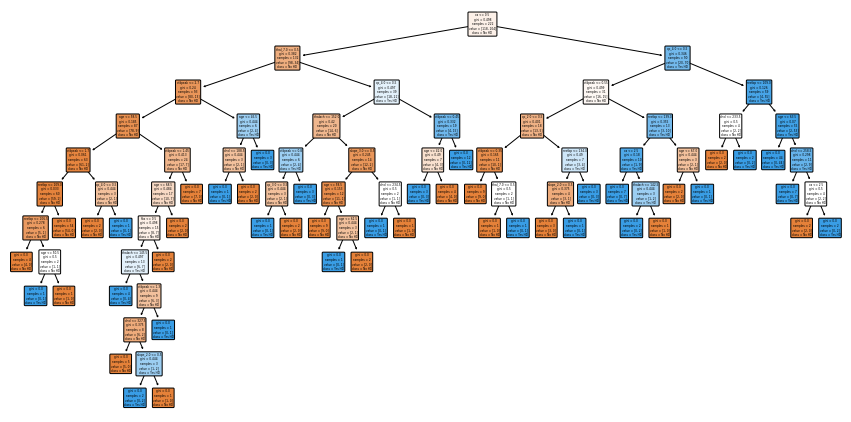

In [44]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf, filled = True, rounded = True,
          class_names = ["No HD", "Yes HD"],
          feature_names = X_encoded.columns);

We've built a **Classification Tree** for classification. Let's see how it performs on the **Test set** down the tree and drawing a **Confusion Matrix**.

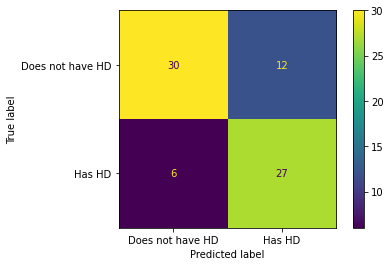

In [45]:
# plot_confusion_matrix() will run the test data down the tree and draw a confusion matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels = ['Does not have HD', 'Has HD'])


In the confusion matrix, we see that of the **30 + 12 = 42** people that did not have **Heart Disease, 30** were correctly calssified. And of the **5 + 28 = 33** people the have **Heart Disease, 28** were correctly classified. 

**Can we do better?**
One thing that might be holding this **Classification Tree** back is that it may **overfit** the training set. So let's prune the tree. Pruning, in therory, should solve the overfitting problem and give us better results.

## Cost Complexity Pruning
## 1. Visualize alpha
**Decission Trees** are notorious for being **overfit** to the training set, and there are a lot of parameters, like **max_depth** and **min_samples**, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simply the whole process of finding a smaller tree that improves the accuracy with the testing set.

Pruning a decision tree is all about finding the right value for the pruning parameter, **alpha**, which controls how little or how much pruning happens. One way to find the optimal value for **alpha** is to plot the accuracy of the tree as a function of different values. We'll do this for both the Training set and the Test set.

First, let's extract the different values of **alpha** that are available for this tree and build a pruned tree for each value for **alpha**. 
### Note:
We omit the maximum value for alpha with **ccp_alphas = ccp_alphas[:-1]** because it would prune all leaves, leaving us with only a root instead of a tree.

In [46]:
# Determine values for alpha
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract different values for alpha
ccp_alphas = path.ccp_alphas

# Exclude the maximum value for alpha
ccp_alphas = ccp_alphas[:-1]

# Create an array that we will put decision trees into
clfs = []

# Now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

Now let's graph the accuracy of the trees using the **Training set** and the **Test set** as a function of alpha.

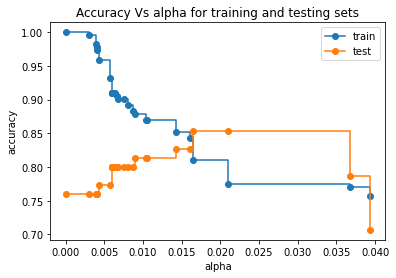

In [47]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy Vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the **Testing set** hits its maximum value when alpha is about **0.017**. After this value for alpha, the accuracy of the **Training** set drops off and that suggests we should set **ccp_alpha = 0.017**.
### Note:
When we apply **Cost Complexity Pruning** to a **Classifier Tree**, values for alpha go from 0 to 1, because GINI scores gp from 0 to 1. In contrast, values for alpha for a **Regression Tree** can be much larger since the sum of squared residuals can, in theory, go from 0 to positive infinity.

Since there are many ways we could have divided the original data into training and testing datasets, how do we know we used the best **Training Dataset** and how do we know we used the best **Test set**? Typically, we answer this question with **10-Fold Cross Validation**. So that's what we're going to do now, and we'll do it with the **cross_val_score()** function.

## 2. Cross Validation For Finding the Best Alpha
The graph we just drew suggested one value for alpha, 0.017, but another set of data might suggest another optimal value.

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set **ccp_alpha = 0.017**. We will do this by using the **cross_val_score()** function to generate different training and testing datasets and then train and test the tree with those datasets.


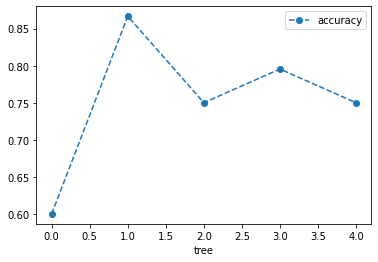

In [48]:
# Create the tree with ccp_alpha = 0.017
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.017)

# Now use 5-fold cross validation create 5 different training and test sets that are then used to train and test the tree.
# Note: We use 5-Fold because we don't have tons of data...

scores = cross_val_score(clf, X_train, y_train, cv=5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})

df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

The graph above shows that using different train and test data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets. So, instead of picking a single training set an single test set, let's use corss validation to find the optimal vlaue for ccp_alpha.

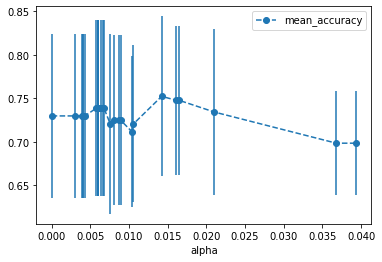

In [49]:
# Create an array to store the results of each fold during cross validation
alpha_loop_values = []

# For each candidate value for alpha, we will run 5-fold cross validation.
# Then we will store the mean and standard deviation of the scores (the accuracy) for each call
# to cross_cal_score in alpha_loop_values...

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  scores = cross_val_score(clf, X_train, y_train, cv=5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# Now we can draw a graph of the means and standard deviations of the scores for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')

Using cross validation, we can set that, over all, instead of setting ccp_alpha = 0.017, we need to set it to something closer to 0.015. We can find the exact value with:

In [50]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.752323,0.091956


Now let's store the ideal value for alpha so that we can use it to build the best tree.

In [51]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

### Note:
At this point Python thinks that ideal_ccp_alpha is a series, which is a type of array. We can tell because when we printed ideal_ccp_alpha out, we got two bits of stuff. The first one was 20, which is index in the series, the second one, 0.014225, is the value we want. So we can convert this from a series to a float with the following command:


In [52]:
# Convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

Now we have the ideal value for alpha and we can build, evaluate and draw the final **Classification Tree**.

# Building, Evaluating, Drawing and Interpreting the Final Classification Tree
Now that we have the ideal value for alpha we can build the final **Classification Tree** by setting ccp_alpha = ideal_ccp_alpha:

In [53]:
# Build and train a new decision tree, only this time use the optimal value for alpha
clf_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_pruned = clf_pruned.fit(X_train, y_train)

Now let's draw another confusion matrix to see if the pruned tree does better.

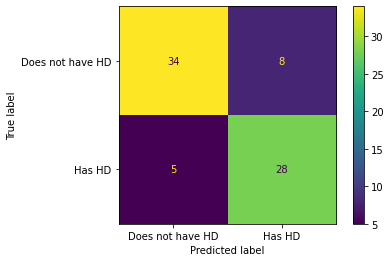

In [54]:
plot_confusion_matrix(clf_pruned, X_test, y_test, 
                      display_labels = ['Does not have HD', 'Has HD'])

We see that the pruned tree is better at classifying patients than the full sized tree. 

Of the **34 + 8 = 42** people that did not have **Heart Disease, 34(81%)** were correctly calssified. This is an improvement over the full sized tree, which only correctly classified **30** of the patients without heart disease. And of the **5 + 28 = 33** people the have **Heart Disease, 28** were correctly classified.

The last we are going to do is draw the pruned tree.

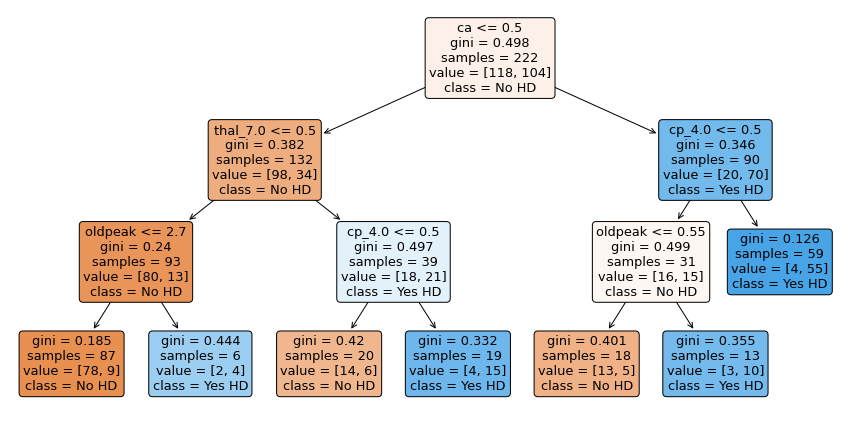

In [55]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_pruned, filled = True, rounded = True, 
          class_names = ['No HD', 'Yes HD'], 
          feature_names=X_encoded.columns);

Let's interpret the tree. in each node, we have:
* The variable (column name) and the threshold for splitting the observations. For example, in the tree's root, we use **ca** to split the observations. All observations with **ca <= 0.5** go to the left and all observations with **ca > 0.5** go to the right.
* **gini** is the gini index or score for that node
* **samples** tell us how many samples are in that node
* **value** tells us how many samples in the node are in each category. In this example, we have two categories, **No** and **Yes**, referring to whether or not a patient has heart disease. The number of patients with **No** comes first because the categories are in alphabetical orger. Thus, in the root, 118 patients have **No** and 104 patients have **Yes**. 
* **class** tells us whichever category is represented most in the node. In the root, since 118 people have **No** and only 104 people have **Yes**, class is set to **No**.

Lastly, the nodes and leaves are colored by the **class**. In this case **No** is different shades of orange-ish and **Yes** is different shades of blue. The darker the shade, the lower the **gini** score, and that tells us how much the node or leaf is skewed towards one class.